In [1]:
!pip install pycryptodome
!pip install matplotlib

import os
import gc
import time
import torch
import tensorflow as tf
from tensorflow.python.client import device_lib

run_simulation = False  # Set this to True when you want to run the simulation

# Clear PyTorch's cache
torch.cuda.empty_cache()

# Print GPU information
print("\n" + "="*40)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(device_lib.list_local_devices())
print("="*40 + "\n")



Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5168282554338500988
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 13804306432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14113769722869533105
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]



In [2]:
!git clone https://github.com/tommysmithgit/VBFLreport
%cd /content/VBFLreport/

fatal: destination path 'VBFLreport' already exists and is not an empty directory.
/content/VBFLreport


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

# Name for VBFL share folder
vbflshare = '/content/drive/My Drive/VBFL'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
# Record the start time
start_time = time.time()

# Run the VBFL simulation
!timeout 120 python main.py -nd 50 -max_ncomm 100 -ha *,*,* -aio 0 -pow 0 -ko 6 -nm 15 -vh 0.05 -cs 0 -B 10 -mn mnist_cnn -iid 0 -lr 0.02 -dtx 1 > output_malicious2.txt

# Record the end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the duration in seconds
print("\n" + "="*40)
print(f"The process ran for {duration} seconds.")
print("="*40 + "\n")

# Copy the output file to the shared Google Drive folder
!cp output_malicious2.txt "$vbflshare/"

# Check if the file was copied successfully
if os.path.exists(f"{vbflshare}/output_malicious2.txt"):
    print("\n" + "="*40)
    print("File output_malicious2.txt successfully copied to shared folder.")
    print("="*40 + "\n")
else:
    print("\n" + "="*40)
    print("Failed to copy file. Please check for errors.")
    print("="*40 + "\n")


The process ran for 120.24978375434875 seconds.


File output_malicious2.txt successfully copied to shared folder.



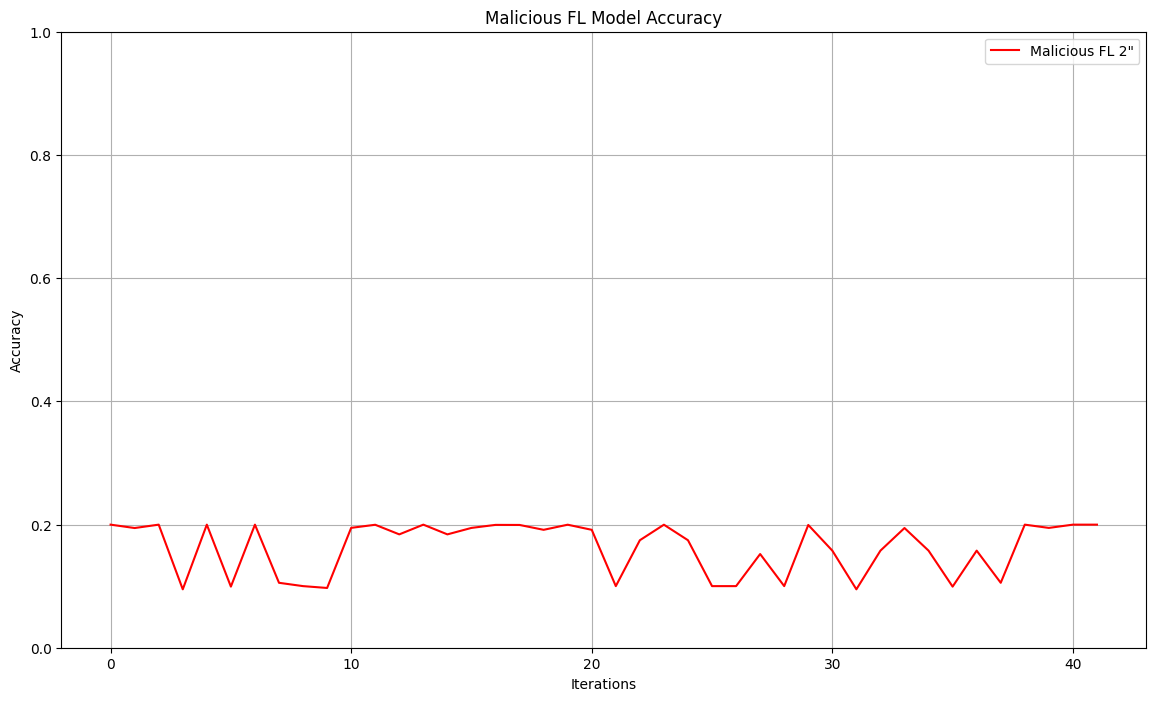

In [5]:
def extract_accuracies(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    accuracies = []
    for line in lines:
        if "model accuracy becomes" in line:
            accuracy_value = float(line.split("model accuracy becomes -")[1].strip())
            accuracies.append(accuracy_value)
        elif "validator updated model accuracy" in line:
            accuracy_value = float(line.split("validator updated model accuracy -")[1].strip())
            accuracies.append(accuracy_value)
    return accuracies

# Extract accuracies
pure_accuracies = extract_accuracies('output_malicious2.txt')

# Plot the accuracies
import matplotlib.pyplot as plt

# Plot for Pure FL
if pure_accuracies:  # Check if the list is not empty
    plt.figure(figsize=(14, 8))
    plt.plot(pure_accuracies, label='Malicious FL 2"', color='Red')
    plt.title('Malicious FL Model Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No accuracies to plot. Please check if the simulation ran correctly.")

In [6]:
# Record the start time
start_time = time.time()

# Run the VBFL simulation
!timeout 300 python main.py -nd 50 -max_ncomm 100 -ha *,*,* -aio 0 -pow 0 -ko 6 -nm 15 -vh 0.05 -cs 0 -B 10 -mn mnist_cnn -iid 0 -lr 0.02 -dtx 1 > output_malicious5.txt

# Record the end time
end_time = time.time()

# Calculate the duration
duration = end_time - start_time

# Print the duration in seconds
print("\n" + "="*40)
print(f"The process ran for {duration} seconds.")
print("="*40 + "\n")

# Copy the output file to the shared Google Drive folder
!cp output_malicious5.txt "$vbflshare/"

# Check if the file was copied successfully
if os.path.exists(f"{vbflshare}/output_malicious5.txt"):
    print("\n" + "="*40)
    print("File output_malicious5.txt successfully copied to shared folder.")
    print("="*40 + "\n")
else:
    print("\n" + "="*40)
    print("Failed to copy file. Please check for errors.")
    print("="*40 + "\n")


The process ran for 300.21598052978516 seconds.


File output_malicious5.txt successfully copied to shared folder.



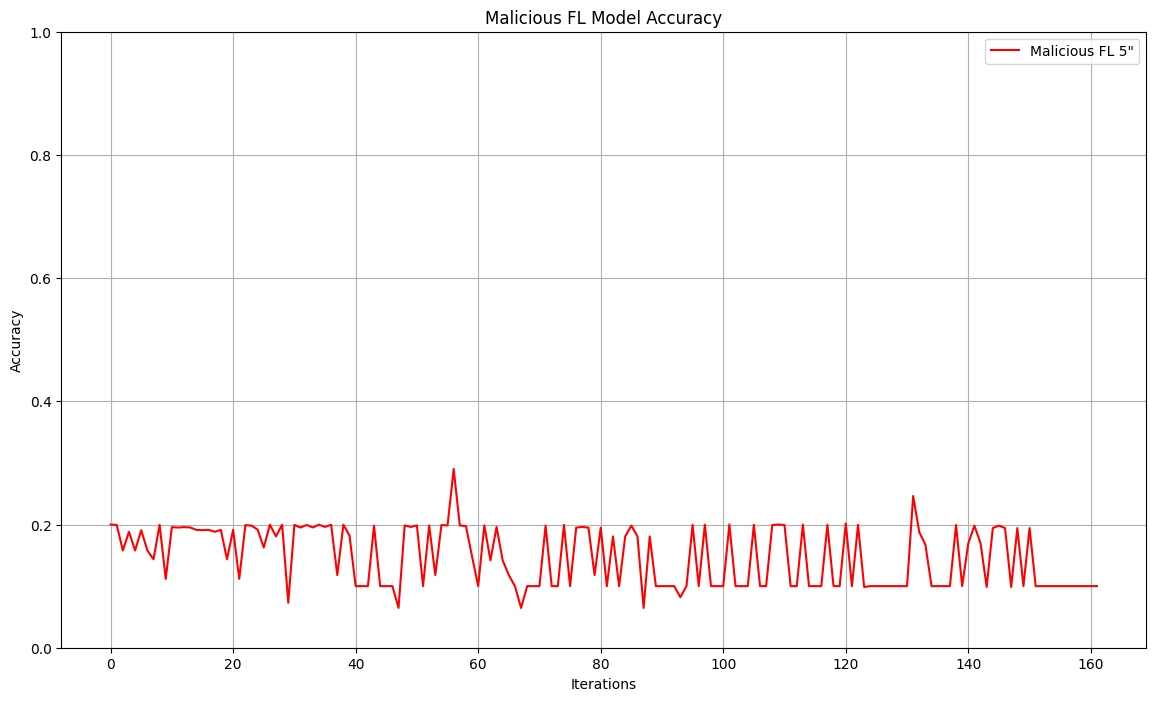

In [7]:
def extract_accuracies(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    accuracies = []
    for line in lines:
        if "model accuracy becomes" in line:
            accuracy_value = float(line.split("model accuracy becomes -")[1].strip())
            accuracies.append(accuracy_value)
        elif "validator updated model accuracy" in line:
            accuracy_value = float(line.split("validator updated model accuracy -")[1].strip())
            accuracies.append(accuracy_value)
    return accuracies

# Extract accuracies
pure_accuracies = extract_accuracies('output_malicious5.txt')

# Plot the accuracies
import matplotlib.pyplot as plt

# Plot for Pure FL
if pure_accuracies:  # Check if the list is not empty
    plt.figure(figsize=(14, 8))
    plt.plot(pure_accuracies, label='Malicious FL 5"', color='Red')
    plt.title('Malicious FL Model Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No accuracies to plot. Please check if the simulation ran correctly.")

In [8]:
# Only run the simulation if run_simulation is True
if run_simulation:
    # Record the start time
    start_time = time.time()

    # Run the VBFL simulation
    get_ipython().system('timeout 600 python main.py -nd 50 -max_ncomm 100 -ha *,*,* -aio 0 -pow 0 -ko 6 -nm 15 -vh 0.05 -cs 0 -B 10 -mn mnist_cnn -iid 0 -lr 0.02 -dtx 1 > output_malicious10.txt')

    # Record the end time
    end_time = time.time()

    # Calculate the duration
    duration = end_time - start_time

    # Print the duration in seconds
    print("\n" + "="*40)
    print(f"The process ran for {duration} seconds.")
    print("="*40 + "\n")

    # Copy the output file to the shared Google Drive folder
    get_ipython().system('cp output_malicious10.txt "$vbflshare/"')

    # Check if the file was copied successfully
    if os.path.exists(f"{vbflshare}/output_malicious10.txt"):
        print("\n" + "="*40)
        print("File output_malicious10.txt successfully copied to shared folder.")
        print("="*40 + "\n")
    else:
        print("\n" + "="*40)
        print("Failed to copy file. Please check for errors.")
        print("="*40 + "\n")


In [9]:
# Only run the simulation if run_simulation is True
if run_simulation:
    def extract_accuracies(filename):
        with open(filename, 'r') as f:
            lines = f.readlines()

        accuracies = []
        for line in lines:
            if "model accuracy becomes" in line:
                accuracy_value = float(line.split("model accuracy becomes -")[1].strip())
                accuracies.append(accuracy_value)
            elif "validator updated model accuracy" in line:
                accuracy_value = float(line.split("validator updated model accuracy -")[1].strip())
                accuracies.append(accuracy_value)
        return accuracies

    # Extract accuracies
    malicious_accuracies = extract_accuracies('output_malicious10.txt')

    # Plot the accuracies
    import matplotlib.pyplot as plt

    # Plot for Malicious FL
    if malicious_accuracies:  # Check if the list is not empty
        plt.figure(figsize=(14, 8))
        plt.plot(malicious_accuracies, label='Malicious FL 10"', color='Red')
        plt.title('Malicious FL Model Accuracy')
        plt.xlabel('Iterations')
        plt.ylabel('Accuracy')
        plt.ylim([0, 1])
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("No accuracies to plot. Please check if the simulation ran correctly.")
